# UK covid stats

* https://wintoncentre.maths.cam.ac.uk/coronavirus/covid-19-resources-make-sense-numbers-test/how-have-covid-19-fatalities-compared-other-causes-death/


In [4]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates 
sns.set_context('talk')

In [123]:
df=pd.read_csv('winton_16wk_covid_vs_other_causes.csv')
sub=df.iloc[:-1,:-1]

In [284]:
df[10:14]

,Age group,Covid (up to July 2020),Injuries/accidents (2018),Influenza/average year (2014/18),Influenza/bad year (2014/15),Road accidents (2018),Homicide/probable homicide (2018),Suicide and injury/poisoning (2018),All causes (2018)
10,50-54,835,239,56,40,30,16,183,3961
11,55-59,1433,194,70,49,26,9,131,5564
12,60-64,2043,160,108,76,21,8,104,7434
13,65-69,2753,179,222,310,18,6,74,10982


## Split into 2 groups

                                      <50  50-69     70+
Covid (up to July 2020)               984   7064   41559
Injuries/accidents (2018)            1325    772    2611
Influenza/average year (2014/18)      114    456    5628
Influenza/bad year (2014/15)           97    475    7860
Road accidents (2018)                 255     95     119
Homicide/probable homicide (2018)     133     39      19
Suicide and injury/poisoning (2018)   958    492     206
All causes (2018)                    8344  27941  129948


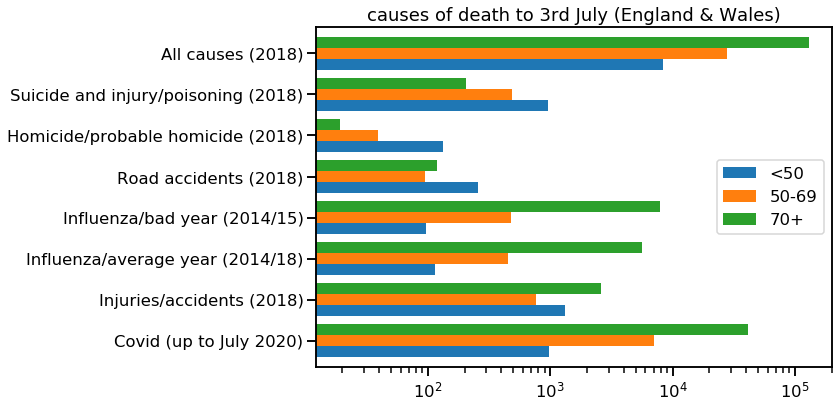

In [289]:
x1 = sub[:10].set_index('Age group').sum()
x2 = sub[10:14].set_index('Age group').sum()
x3 = sub[14:].set_index('Age group').sum()
x = pd.DataFrame([x1,x2,x3]).T
x.columns=['<50','50-69','70+']
print (x)
ax=x.plot(kind='barh',figsize=(12,6),width=.8,logx=True)
ax.set_title('causes of death to 3rd July (England & Wales)')
plt.tight_layout()
plt.savefig('eng_wales_deaths_causes_all.png')

In [260]:
sub=df.iloc[:,:-1]
m=pd.melt(sub,id_vars='Age group',var_name='Cause')

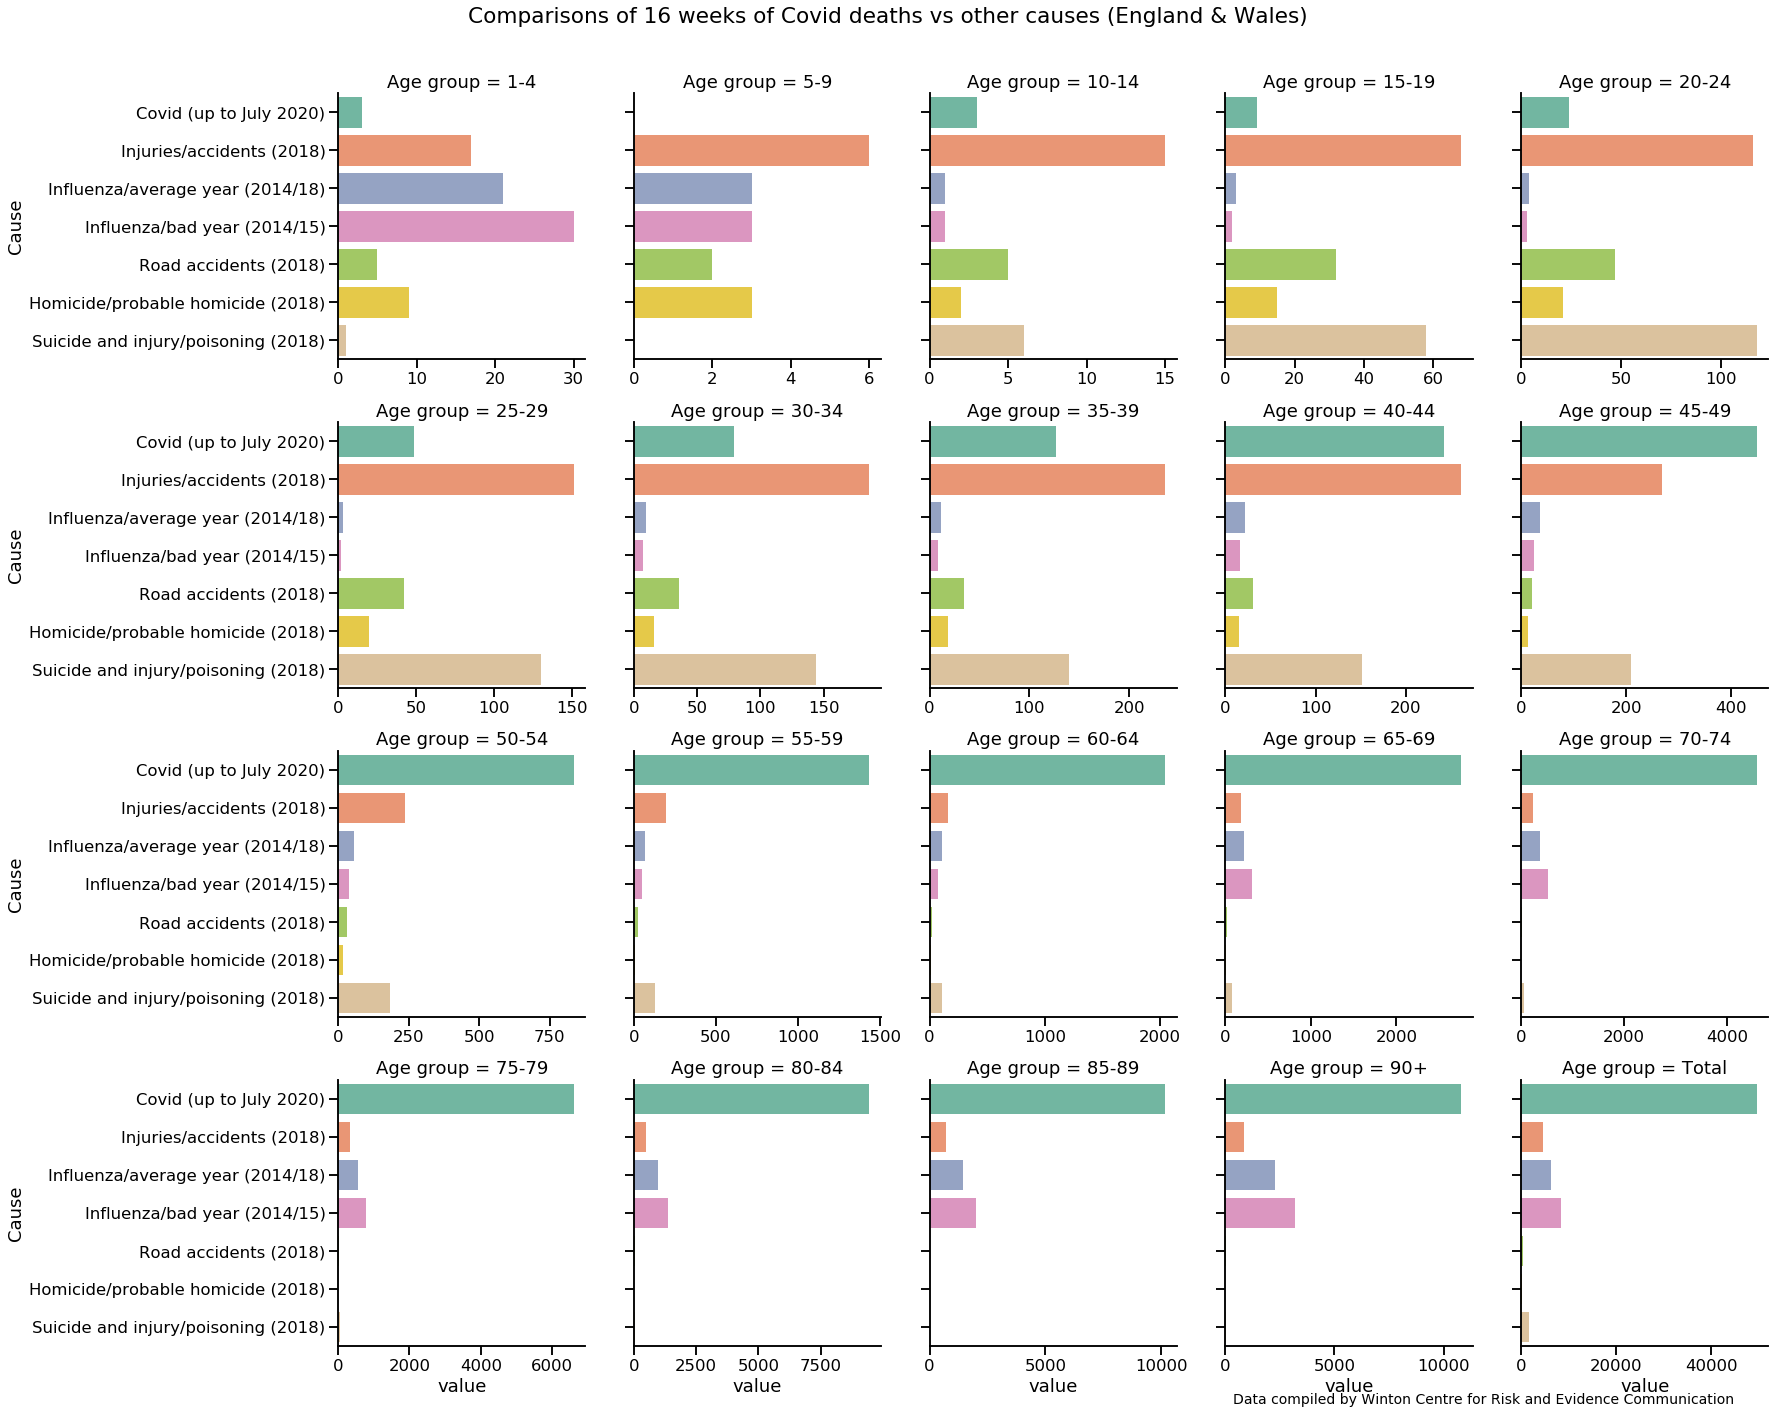

In [261]:
g=sns.catplot(data=m,y='Cause',x='value',col='Age group',col_wrap=5,kind='bar',sharex=False,palette='Set2')
g.fig.suptitle('Comparisons of 16 weeks of Covid deaths vs other causes (England & Wales)')
plt.subplots_adjust(top=0.92,bottom=.05)
plt.figtext(0.97, 0.01, "Data compiled by Winton Centre for Risk and Evidence Communication", ha="right", fontsize=14)
g.savefig('eng_wales_deaths_causes_byage.png')

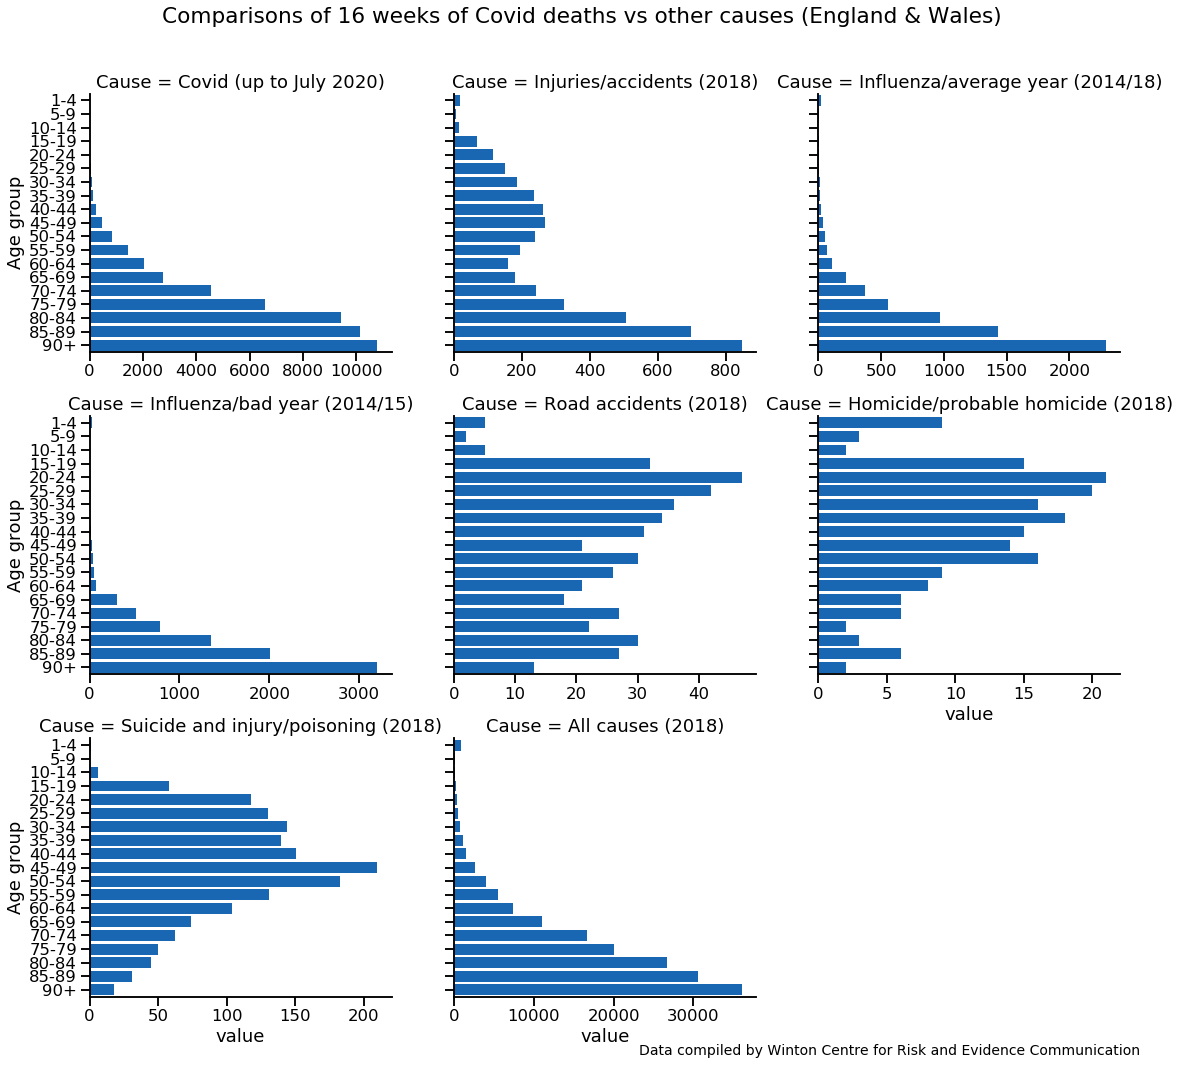

In [263]:
sub=df.iloc[:-1]
m=pd.melt(sub,id_vars='Age group',var_name='Cause')
g=sns.catplot(data=m,y='Age group',x='value',col='Cause',col_wrap=3,kind='bar',aspect=1.1,sharex=False,color='#0066CC')
g.fig.suptitle('Comparisons of 16 weeks of Covid deaths vs other causes (England & Wales)')
plt.subplots_adjust(top=0.9)
plt.figtext(0.97, 0.01, "Data compiled by Winton Centre for Risk and Evidence Communication", ha="right", fontsize=14)
g.savefig('eng_wales_deaths_causes_bycause.png')

## UK Gov data

https://coronavirus.data.gov.uk/details/download

https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumCasesBySpecimenDate&metric=newCasesByPublishDate&metric=newDeathsByDeathDate&metric=newPCRTestsByPublishDate&metric=newAdmissions&format=csv

In [23]:
locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

In [25]:
ov=pd.read_csv('overview_2020-11-20.csv')
ov=ov.sort_values('date')
ov[-5:]

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,newCasesByPublishDate,newDeathsByDeathDate,newPCRTestsByPublishDate,newAdmissions
4,2020-11-16,overview,K02000001,United Kingdom,1438542.0,21363,NaN,223912.0,1737.0
3,2020-11-17,overview,K02000001,United Kingdom,1460029.0,20051,NaN,273273.0,NaN
2,2020-11-18,overview,K02000001,United Kingdom,1472235.0,19609,NaN,356295.0,NaN
1,2020-11-19,overview,K02000001,United Kingdom,1473507.0,22915,NaN,386825.0,NaN
0,2020-11-20,overview,K02000001,United Kingdom,NaN,20252,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


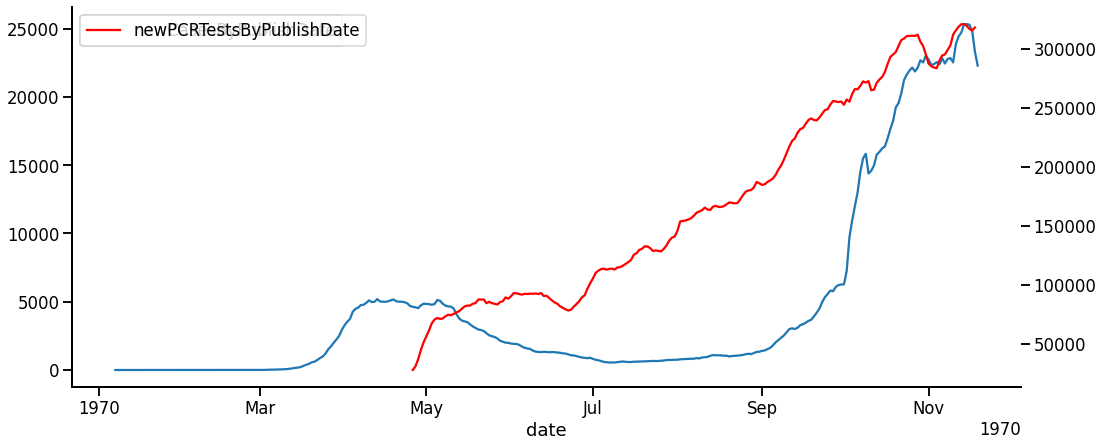

In [26]:
window=7
x = ov.set_index('date').rolling(window).mean()

f,ax=plt.subplots(figsize=(17,7))

x.plot(y=['newCasesByPublishDate'],ax=ax)
ax1=ax.twinx()
x.plot(y=['newPCRTestsByPublishDate'],c='red',ax=ax1)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
sns.despine()